In [2]:
# imports
from drn_interactions.io import load_derived_generic
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from drn_interactions.config import Config

from drn_interactions.plots import PAL_GREY_BLACK

c:\Users\roryl\.conda\envs\drn38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
sns.set_theme(context="paper", style="ticks", palette=PAL_GREY_BLACK)

In [5]:
# load data

# pairwise
df_corr = (
    load_derived_generic("corrs/fs - corr.csv",)
    .assign(mag=lambda x: np.abs(x["corr"]))
    .assign(rect=lambda x: np.where(x["corr"] < 0, 0, x["corr"]))
)

df_ensembles = (
    load_derived_generic("ensembles/fs - ensembles.csv",)
    .groupby(["session_name", "block", "bin_width"])
    ["ensemble_id"]
    .nunique()
    .subtract(1)
    .to_frame("Number of Ensembles")
    .reset_index()
)

df_seq = load_derived_generic("seqnmf/fs - sequenciness scores.csv",).query("bin_width < 2")


C:\Users\roryl\AppData\Local\Temp\ipykernel_18316\2989889071.py:53: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  f.subplots_adjust(hspace=0.7)


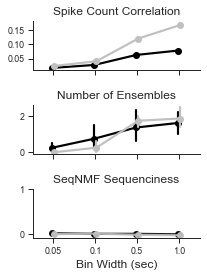

In [10]:
f = plt.figure(figsize=(3, 4), constrained_layout=True)
ax = f.subplots(3, 1, sharex=True)

sns.pointplot(
    x="bin_width",
    y="rect",
    hue="block",
    data=df_corr,
    estimator=np.mean,
    ax=ax[0],
    dodge=True,
    hue_order=["base_shock", "pre"]
)

ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_title("Spike Count Correlation", fontsize=12)

sns.pointplot(
    x="bin_width",
    y="Number of Ensembles",
    hue="block",
    data=df_ensembles,
    estimator=np.mean,
    ax=ax[1],
    dodge=True,
    hue_order=["base_shock", "pre"]
)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_title("Number of Ensembles", fontsize=12)

g_seq = sns.pointplot(
    x="bin_width",
    y="score",
    hue="block",
    data=df_seq,
    estimator=np.mean,
    ax=ax[2],
    dodge=True,
    hue_order=["base_shock", "pre"]
)
ax[2].set_ylabel("")
ax[2].set_xlabel("")
ax[2].set_title("SeqNMF Sequenciness", fontsize=12)
ax[2].set_ylim(-0.1, 1)
ax[2].set_xlabel("Bin Width (sec)", fontsize=12)

plt.setp(g_seq.collections, alpha=.9)
plt.setp(g_seq.lines, alpha=.9) 

sns.despine(fig=f)
f.subplots_adjust(hspace=0.7)
for ax_ in ax:
    ax_.legend().remove()

# f.savefig(Config.fig_dir / "fs - interactions - timescale.png", bbox_inches="tight", dpi=300)